## Table of Contents
* [Module 6: Digital Twins](#Module-6:-Digital-Twins)
    * [User Stories](#User-Stories:)
    * [Digital Modeling](#Digital-Modeling:)
    * [Data Transmission](#Data-Transmission:)
        * [Photodiode raw data preprocessing and Signal-to-image Mapping](#Photodiode-raw-data-preprocessing-and-Signal-to-image-Mapping)
        * [Microphone raw data preprocessing and Signal-to-image Mapping](#Microphone-raw-data-preprocessing-and-Signal-to-image-Mapping)
    * [Physical to Virtual](#Physical-to-Virtual:)
        * [Model training](#Model-training)
    * [Assessment](#Assessment:)
        * [Take a quiz](http://example.com/quiz)
#### [🏠 Home](../../welcomePage.ipynb)

## Module 6: Digital Twins
As introduced at the Green Belt level, constructing a digital twin requires a structured approach involving specific techniques and sequential steps. This section provides a detailed overview, accompanied by relevant code examples, to illustrate the implementation of digital twin technology.

### User Story 1
**Add Levi's example here**

### User Story 2
**Digital Twins for Selective laser melting (SLM) Process Control**

Selective laser melting (SLM) is a widely utilized technique in additive manufacturing for creating metal components with intricate geometries and high precision. However, its practical adoption is limited by inconsistent process reproducibility and unreliable product quality. This highlights the urgent need for in-situ quality monitoring and real-time process control. A feature-level multi-sensor fusion method is introduced, combining acoustic emission signals with photodiode signals for in-situ quality monitoring in SLM's intelligence-driven production. An off-axis monitoring system with a microphone and photodiode captures process signatures during building. Based on 2D porosity and 3D density measurements, the collected acoustic and optical signals are categorized to indicate part quality. Considering laser scanning data, a method is developed to transform 1D signals into 2D images, which are then used to train a convolutional neural network to extract and merge features from both sensors. Compared to several baseline models, the proposed multi-sensor fusion method delivers superior performance in quality monitoring.

### Digital Modeling:

In this study, a digital model for in-situ quality monitoring is constructed using machine learning techniques, specifically a feature-level multi-sensor fusion approach based on 2D CNN. Acoustic emission and photodiode signals serve as input data, while the quality of the 3D-printed product is the output. The proposed method follows a three-step process: data acquisition and preprocessing, signal-to-image mapping, and CNN-based feature fusion for quality assessment. The overview of the digital modeling is shown below

<center>
    <img src="Module 6 Content/proposed_model.png" alt="Drawing" style="width: 600px;" title=" Experimental setup and a schematic representation of the SLM system"/>
<center>

### Data Transmission:


#### Photodiode raw data preprocessing and Signal-to-image Mapping

This is a sample code for collecting raw data from photodiode and data transmission.

#### Press ▶️ to read the photodiode raw data and convert it to image-based data.

phd_1_200_17 is loaded
phd_0_40_17 is loaded
phd_2_80_17 is loaded
phd_0_50_17 is loaded
phd_2_140_17 is loaded
phd_2_90_17 is loaded
phd_1_68_17 is loaded
phd_1_65_17 is loaded
phd_1_190_17 is loaded
phd_2_120_17 is loaded
phd_0_45_17 is loaded
phd_0_55_17 is loaded
phd_0_60_17 is loaded
phd_1_180_17 is loaded
phd_2_130_17 is loaded


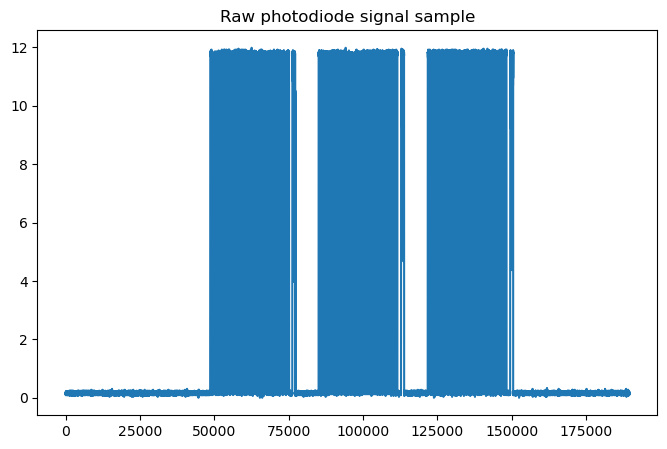

phd_1_200_17 Processing complete.
phd_0_40_17 Processing complete.
phd_2_80_17 Processing complete.
phd_0_50_17 Processing complete.
phd_2_140_17 Processing complete.
phd_2_90_17 Processing complete.
phd_1_68_17 Processing complete.
phd_1_65_17 Processing complete.
phd_1_190_17 Processing complete.
phd_2_120_17 Processing complete.
phd_0_45_17 Processing complete.
phd_0_55_17 Processing complete.
phd_0_60_17 Processing complete.
phd_1_180_17 Processing complete.
phd_2_130_17 Processing complete.


Text(0.5, 1.0, 'Image sample from photodiode after data transmission')

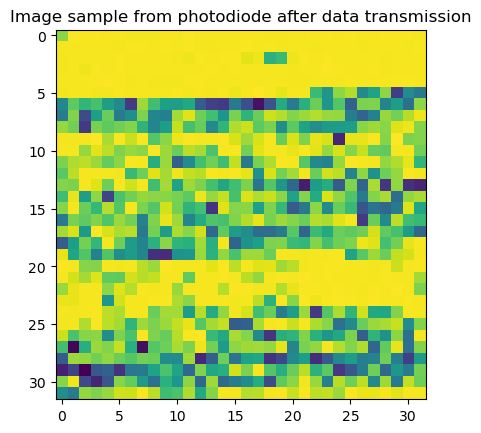

In [20]:
import os
from scipy.io import loadmat
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display


data_dict = {}
directory_path = "../Examples/3. Advanced Topics/3.3. Sensor Fusion Processing/data/photodiode"

for filename in os.listdir(directory_path):
    if filename.endswith('.mat'):
        file_path = os.path.join(directory_path, filename)
        mat_data = loadmat(file_path)
        
        data_name = os.path.splitext(filename)[0]
        print(data_name+' is loaded')
        data_dict[data_name] = mat_data

x = list(data_dict.keys())[0]
y = list(data_dict[x].keys())[3]

plt.figure(figsize=(8,5),dpi=100)
plt.plot(data_dict[x][y])
plt.title("Raw photodiode signal sample")
plt.show()

for j in range(len(data_dict.keys())):
    
    filename = list(data_dict.keys())[j]

    parts = filename.split('_')
    phd_grade = int(parts[1]) 
    phd_num = int(parts[2])
    
    filtered_data = []
    data_all = []
    for m in range(1,18):
        x = data_dict[filename]['cDAQ1Mod4ai'+str(m)]
        y = x[x>2]
        filtered_data.append(y)

    # folder = save_folder + str(phd_grade)
    n = 32  # Size of each image

    for i in range(1, 18):  # based on each layer, 17 layers in total
        data = filtered_data[i-1]
        N = len(data)
        W = n * n  # Window size
        hd = 10 * 10000 // 520  # Sliding step size
        hdcs = (N - W) // hd + 1  # Number of sliding steps

        for k in range(1, hdcs + 1):
            one_data = data[(k-1) * hd: (k-1) * hd + W]
            # Normalize and scale the data to 0-255
            one_data = np.round((one_data - np.min(one_data)) / (np.max(one_data) - np.min(one_data)) * 255).astype(np.uint8)
            # Reshape the image
            one_data = one_data.reshape((n, n)) 
            
            data_all.append(one_data)
            # # Save the image
            # image_filename = f'p_{phd_num}_{i}_{k}.png'
            # image_path = os.path.join(folder, image_filename)
            # Image.fromarray(one_data).save(image_path)

    print(filename, "Processing complete.")

data_sample = np.array(data_all[0])

plt.imshow(data_sample)
plt.title('Image sample from photodiode after data transmission')

#### Microphone raw data preprocessing and Signal-to-image Mapping

This is a sample code for collecting microphone raw data and data transmission.

#### Press ▶️ to read the microphone raw data and convert it to image-based data.

mcp_1_65_17 is loaded
mcp_2_140_17 is loaded
mcp_1_68_17 is loaded
mcp_2_90_17 is loaded
mcp_0_50_17 is loaded
mcp_2_80_17 is loaded
mcp_0_40_17 is loaded
mcp_1_200_17 is loaded
mcp_0_60_17 is loaded
mcp_0_55_17 is loaded
mcp_1_180_17 is loaded
mcp_2_130_17 is loaded
mcp_1_190_17 is loaded
mcp_0_45_17 is loaded
mcp_2_120_17 is loaded


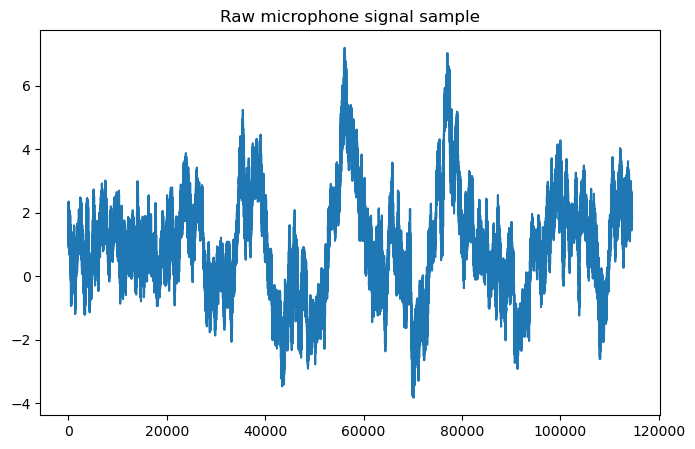

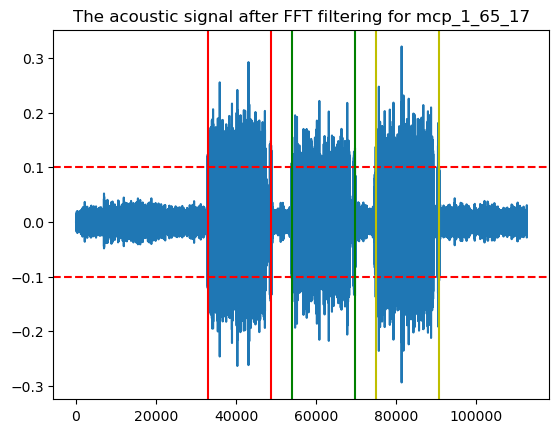

mcp_1_65_17 Processing complete.
mcp_2_140_17 Processing complete.
mcp_1_68_17 Processing complete.
mcp_2_90_17 Processing complete.
mcp_0_50_17 Processing complete.
mcp_2_80_17 Processing complete.
mcp_0_40_17 Processing complete.
mcp_1_200_17 Processing complete.
mcp_0_60_17 Processing complete.
mcp_0_55_17 Processing complete.
mcp_1_180_17 Processing complete.
mcp_2_130_17 Processing complete.
mcp_1_190_17 Processing complete.
mcp_0_45_17 Processing complete.
mcp_2_120_17 Processing complete.


Text(0.5, 1.0, 'Image sample from microphone after data transmission')

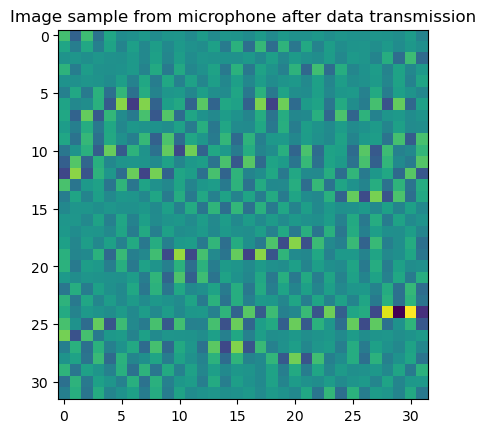

In [21]:
import os
from scipy.io import loadmat
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display

data_dict = {}
directory_path = "../Examples/3. Advanced Topics/3.3. Sensor Fusion Processing/data/microphone"

for filename in os.listdir(directory_path):
    if filename.endswith('.mat'):
        file_path = os.path.join(directory_path, filename)
        mat_data = loadmat(file_path)
        
        data_name = os.path.splitext(filename)[0]
        print(data_name+' is loaded')
        data_dict[data_name] = mat_data

x = list(data_dict.keys())[0]
y = list(data_dict[x].keys())[3]

plt.figure(figsize=(8,5),dpi=100)
plt.plot(data_dict[x][y])
plt.title("Raw microphone signal sample")
plt.show()


for i in range(len(data_dict.keys())):
    filename = list(data_dict.keys())[i]
    parts = filename.split('_')
    mcp_grade = int(parts[1]) 
    mcp_num = int(parts[2])
    
    filtered_data = []
    data_all = []
    for j in range(1,18):
        x = data_dict[filename]['cDAQ1Mod2ai'+str(j)]
#         print(x.shape)

        data = x

        data_1 = data.reshape(len(data),)
        N = len(data)
        fs = 10000  # Sampling frequency
        t = np.arange(1, N+1)  # Sampling moments

        # FFT of the data
        data_fft = np.fft.fft(data_1)
        df = fs / N  # Frequency sampling interval
        data_f = np.arange(0, N) * df

        # Find the indices where frequency is less than 4000 Hz
        id0 = np.where(data_f < 4000)[0]
        id0_len = len(id0)

        # Filtering to make the low frequency part as 0
        data_fft[id0] = 0
        data_fft[-id0_len+1:] = 0

        # Inverse FFT after filtering
        data_ifft = np.real(np.fft.ifft(data_fft))
        
        data_ifft = data_ifft[1000:-1000]
        
        indices = np.where(data_ifft > 0.1)[0]
        first_index = indices[0]
        last_index = indices[-1]
        
        first_third_index = int((last_index - first_index)/3) + first_index
        second_third_index = int(2*(last_index - first_index)/3) + first_index

        first_valid_indices = indices[indices < first_third_index]
        first_valid_indice = first_valid_indices[-1]
        
        second_valid_indices_start = indices[indices > first_third_index]
        second_valid_indice_start = second_valid_indices_start[0]
        second_valid_indices_end = indices[indices < second_third_index]
        second_valid_indice_end = second_valid_indices_end[-1]
        
        third_valid_indices = indices[indices > second_third_index]
        third_valid_indice = third_valid_indices[0]

        if (j == 1) and (i==0):
            # Plot the result
            plt.plot(data_ifft)
            plt.title("The acoustic signal after FFT filtering for "+filename)
            plt.axhline(0.1,color = 'r',linestyle='--')
            plt.axhline(-0.1,color = 'r',linestyle='--')
            plt.axvline(first_index,color = 'r')
            plt.axvline(first_valid_indice,color = 'r')
            plt.axvline(second_valid_indice_start,color = 'g')
            plt.axvline(second_valid_indice_end,color = 'g')
            plt.axvline(third_valid_indice,color = 'y')
            plt.axvline(last_index,color = 'y')
            
            plt.show()
        
        y = np.concatenate([data_ifft[first_index:first_valid_indice],
                            data_ifft[second_valid_indice_start:second_valid_indice_end],
                            data_ifft[third_valid_indice:last_index]])
#         print(y.shape)
        filtered_data.append(y)
       
    # folder = save_folder + str(mcp_grade)
    n = 32  # Size of each image

    for m in range(1, 18):  # based on each layer, 17 layers in total
        data = filtered_data[m-1]
        N = len(data)
        W = n * n  # Window size
        hd = 10 * 10000 // 520  # Sliding step size
        hdcs = (N - W) // hd + 1  # Number of sliding steps

        for k in range(1, hdcs + 1):
            one_data = data[(k-1) * hd: (k-1) * hd + W]
            # Normalize and scale the data to 0-255
            one_data = np.round((one_data - np.min(one_data)) / (np.max(one_data) - np.min(one_data)) * 255).astype(np.uint8)
            # Reshape the image
            one_data = one_data.reshape((n, n)) 
            
            data_all.append(one_data)
            # # Save the image
            # image_filename = f'p_{mcp_num}_{m}_{k}.png'
            # image_path = os.path.join(folder, image_filename)
            # Image.fromarray(one_data).save(image_path)
            
    print(filename, "Processing complete.")

data_sample = np.array(data_all[0])

plt.imshow(data_sample)
plt.title('Image sample from microphone after data transmission')

### Physical to Virtual:

For selective laser melting (SLM), the **physical** domain consists of the manufacturing process itself, where metal powder is selectively melted layer by layer to create a final component. However, due to process variability, ensuring consistent quality remains a significant challenge.

The **virtual** domain represents the digital modeling and monitoring of the SLM process, where sensor data is collected, processed, and analyzed to predict and control manufacturing quality. By bridging the physical and virtual worlds, we can achieve real-time insights and adaptive process control.

To accomplish this transformation, an off-axis monitoring system captures physical process signatures using a microphone and a photodiode. These 1D acoustic and optical signals are then virtually processed by converting them into 2D image representations, incorporating laser scanning data. A convolutional neural network (CNN) extracts and fuses features from both sensors, enabling accurate in-situ quality assessment. This data-driven approach enhances process understanding and improves the reliability of SLM production.

In [1]:
import time
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import scipy.io as sio
from sklearn.model_selection import train_test_split
from PIL import Image
import pywt
from ipywidgets import interact, IntSlider
import ipywidgets as widgets
import warnings


all_path_microphone = []
signal_microphone = os.listdir("../Examples/3. Advanced Topics/3.3. Sensor Fusion Processing/data/image_data/microphone")
signal_microphone = signal_microphone[1:]
for f, fsignal in enumerate(signal_microphone):
    filepath = "../Examples/3. Advanced Topics/3.3. Sensor Fusion Processing/data/image_data/microphone" + "/" + fsignal
    filename = os.listdir(filepath)
    for fname in filename:
        ffpath = filepath + "/" + fname
        path = [f, ffpath]
        all_path_microphone.append(path)
# print(len(all_path_microphone))

def display_image_mcp(index):
    img_path = all_path_microphone[index][1]
    img = cv2.imread(img_path, 0)  

    plt.figure(figsize=(10, 6))
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # Hide the axis
    plt.show()

interact(display_image_mcp, index=IntSlider(min=0, max=len(all_path_microphone)-1, step=1, value=0,description='Microphone'))



all_path_photodiode = []
signal_photodiode = os.listdir("../Examples/3. Advanced Topics/3.3. Sensor Fusion Processing/data/image_data/photodiode")
signal_photodiode = [x for x in signal_photodiode if x != '.DS_Store']

for f, fsignal in enumerate(signal_photodiode):
    filepath = os.path.join("../Examples/3. Advanced Topics/3.3. Sensor Fusion Processing/data/image_data/photodiode", fsignal)
    filename = os.listdir(filepath)
    # Additional check for .DS_Store inside subdirectories
    filename = [file for file in filename if file != '.DS_Store']
    for fname in filename:
        ffpath = os.path.join(filepath, fname)
        path = [f, ffpath]
        all_path_photodiode.append(path)

# all_path_photodiode = []
# signal_photodiode = os.listdir("../image_data/Photodiode")
# signal_photodiode = signal_photodiode[1:]
# for f, fsignal in enumerate(signal_photodiode):
#     filepath = "../image_data/Photodiode" + "/" + fsignal
#     filename = os.listdir(filepath)
#     for fname in filename:
#         ffpath = filepath + "/" + fname
#         path = [f, ffpath]
#         all_path_photodiode.append(path)
# # print(len(all_path_photodiode))

def display_image_phd(index):
    img_path = all_path_photodiode[index][1]
    img = cv2.imread(img_path, 0)  

    plt.figure(figsize=(10, 6))
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # Hide the axis
    plt.show()
    
interact(display_image_phd, index=IntSlider(min=0, max=len(all_path_photodiode)-1, step=1, value=0,description='Photodiode'))


i=0
data_x1_list = []
data_x2_list = []
data_y1_list = []
data_y2_list = []

for item1, item2 in zip(all_path_microphone,all_path_photodiode):
    # print(item[0],item[1]) # 0 E:\ml_datasets\zhoucheng_data\0\0_1.png
    if item1[0] == item2[0]:
        img1=cv2.imread(item1[1],0)    
        img2=cv2.imread(item2[1],0)  
        
        arr1 = np.asarray(img1, dtype="float32")
        data_x1_list.append(arr1)
        
        arr2 = np.asarray(img2, dtype="float32")
        data_x2_list.append(arr2)
        
        i += 1
        data_y1_list.append(item1[0])
        data_y2_list.append(item2[0])

data_x1 = np.stack(data_x1_list, axis=0)[:, np.newaxis, :, :]
data_y1 = np.stack(data_y1_list, axis=0)
data_x2 = np.stack(data_x2_list, axis=0)[:, np.newaxis, :, :]
data_y2 = np.stack(data_y2_list, axis=0)

# print(data_x1.shape)
# print(data_y1.shape)
# print(data_x2.shape)
# print(data_y2.shape)

data_x1 = data_x1 / 255
data_x2 = data_x2 / 255
data_y1 = np.asarray(data_y1)
data_y2 = np.asarray(data_y2)

data_x1 = torch.from_numpy(data_x1)
data_y1 = torch.from_numpy(data_y1)
data_y1 = data_y1.long()

X1_train, X1_test, Y1_train, Y1_test = train_test_split(data_x1,
                                                    data_y1,
                                                    test_size=0.2,
                                                    random_state=999,
                                                    stratify=data_y1)
data_x2 = torch.from_numpy(data_x2)
data_y2 = torch.from_numpy(data_y2)
data_y2 = data_y2.long()

X2_train, X2_test, Y2_train, Y2_test = train_test_split(data_x2,
                                                    data_y2,
                                                    test_size=0.2,
                                                    random_state=999,
                                                    stratify=data_y2)


data1 = Data.TensorDataset(X1_train, X2_train, Y1_train)
data2 = Data.TensorDataset(X1_test, X2_test, Y1_test)
train_loader = Data.DataLoader(data1, batch_size=24,shuffle=True)
valid_loader = Data.DataLoader(data2, batch_size=24)
# print(len(data1))
# print(len(data2))

print('The sensor data is loaded')

interactive(children=(IntSlider(value=0, description='Microphone', max=58229), Output()), _dom_classes=('widge…

interactive(children=(IntSlider(value=0, description='Photodiode', max=67204), Output()), _dom_classes=('widge…

NameError: name 'torch' is not defined

#### Model training

In [ ]:
import torch
import torch.utils.data as Data
import torchvision
import torch.nn as nn
from torchvision import datasets,transforms,models
from torchsummary import summary
from torch.utils.tensorboard import SummaryWriter
import torch.onnx
from tqdm import tqdm


class CNN_original(nn.Module):
    def __init__(self):
        super(CNN_original, self).__init__()  
        self.conv1 = nn.Sequential(
            # [1,64,64]
            nn.Conv2d(
                in_channels=1,    
                out_channels=16,  
                kernel_size=5,    
                stride=1,         
                padding=2,        
            ),
            # [16,64,64] 
            nn.MaxPool2d(kernel_size=2)   # [16,32,32] 
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels=16,   
                out_channels=32,
                kernel_size=5,
                stride=1,
                padding=2
            ),
            # [32, 32, 32] 
            nn.MaxPool2d(kernel_size=2)  # [32,16,16] 
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(
                in_channels=32,    
                out_channels=64,
                kernel_size=5,
                stride=1,
                padding=2
            ),
            # [64, 16, 16]
            nn.MaxPool2d(kernel_size=2)  # [64,8,8]
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(
                in_channels=64,    
                out_channels=64,
                kernel_size=5,
                stride=1,
                padding=2
            ),
            # [64, 8, 8] 
            nn.MaxPool2d(kernel_size=2)  # [64,4,4] 
        )
            
        
        self.output = nn.Sequential(
            nn.Linear(in_features=64*2*2*2, out_features=128),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=128, out_features=3)
        )
    

    def forward(self, x1, x2):           # [64×64×1]
        x1 = self.conv1(x1)           # [64×64×16]
        x1 = self.conv2(x1)           # [64×64×16]
        
        x2 = self.conv1(x2)           # [64×64×16]
        x2 = self.conv2(x2)           # [64×64×16] 
           
        
        x = torch.cat((x1,x2),3)

        x = self.conv3(x)
        x = self.conv4(x)
        
        x = x.view(x.size(0), -1)   
               
        output = self.output(x)     
        return output

model = CNN_original()

class CNN(nn.Module):
    def __init__(self, conv_params):
        super(CNN, self).__init__()
        # Unpacking parameters for each layer
        c1_out, c1_kernel, c1_stride, c1_padding = conv_params['conv1']
        c2_out, c2_kernel, c2_stride, c2_padding = conv_params['conv2']
        c3_out, c3_kernel, c3_stride, c3_padding = conv_params['conv3']
        c4_out, c4_kernel, c4_stride, c4_padding = conv_params['conv4']

        # Define the layers using the unpacked parameters
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, c1_out, c1_kernel, c1_stride, c1_padding),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(c1_out, c2_out, c2_kernel, c2_stride, c2_padding),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(c2_out, c3_out, c3_kernel, c3_stride, c3_padding),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(c3_out, c4_out, c4_kernel, c4_stride, c4_padding),
            nn.MaxPool2d(kernel_size=2)
        )
        self.output = nn.Sequential(
            nn.Linear(c4_out * 4 * 2, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 3)
        )

    def forward(self, x1, x2):
        x1 = self.conv1(x1)
        x1 = self.conv2(x1)
        
        x2 = self.conv1(x2)
        x2 = self.conv2(x2)
        
        x = torch.cat((x1, x2), 3)
        x = self.conv3(x)
        x = self.conv4(x)
        
        x = x.view(x.size(0), -1)
        return self.output(x)


# Function to create a slider with customized width
def create_custom_slider(description, value, min, max, step):
    return widgets.IntSlider(
        value=value,
        min=min,
        max=max,
        step=step,
        description=description,
        style={'description_width': 'initial'},  # This allows the description to take as much space as it needs
        layout=widgets.Layout(width='50%')  # Adjust the width of the slider itself
    )

# Example usage in a model parameter context
def create_param_sliders():
    params = {
        'conv1': [16, 5, 1, 2],  # example values: out_channels, kernel_size, stride, padding
        'conv2': [32, 5, 1, 2],
        'conv3': [64, 5, 1, 2],
        'conv4': [64, 5, 1, 2]
    }
    sliders = {}
    for layer, param in params.items():
        sliders[layer] = [
            create_custom_slider(f'{layer} out_channels', param[0], 16, 128, 16),
            create_custom_slider(f'{layer} kernel_size', param[1], 3, 7, 1),
            create_custom_slider(f'{layer} stride', param[2], 1, 3, 1),
            create_custom_slider(f'{layer} padding', param[3], 0, 4, 1)
        ]
    return sliders

sliders = create_param_sliders()
ui = widgets.VBox([widgets.VBox(s) for s in sliders.values()])
display(ui)

def on_button_clicked(b):
    conv_params = {k: [s.value for s in v] for k, v in sliders.items()}
    global model_1
    model_1 = CNN(conv_params)
    print(model_1)
    
button = widgets.Button(description="Update Model")
button.on_click(on_button_clicked)
display(button)

def confusion_matrix(labels, preds, conf_matrix):
    for p, t in zip(labels, preds):
        conf_matrix[p, t] += 1
    return conf_matrix



summary(model, input_size=[(1, 32, 32), (1, 32, 32)])  # Specify the input size of the network
# writer = SummaryWriter('runs/model_visualization')
# dummy_input1 = torch.randn(1, 1, 32, 32)
# dummy_input2 = torch.randn(1, 1, 32, 32)
# writer.add_graph(model, (dummy_input1, dummy_input2))
# writer.close()
# torch.onnx.export(model, (dummy_input1, dummy_input2), "model.onnx")
# !netron model.onnx



loss_f = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
epochs = 30
Train_epoch, Test_epoch, Train_accuracy, Test_accuracy, Loss = [], [], [], [], []
Train_time, Test_time = [], []
time0 = time.time()
Predict_label, True_label = [], []

for epoch in range(epochs):
    time1 = time.time()
    Train_epoch.append(epoch + 1)
    running_loss, running_correct = 0, 0
    print("Epoch {}/{}".format(epoch + 1, epochs))
    print("-" * 10)

    # Wrap train_loader with tqdm for a progress bar
    for data in tqdm(train_loader, desc="Training"):
        X1_train, X2_train, Y_train = data
        # Assume model and data are on the same device, add .to(device) if needed
        y_pred = model(X1_train, X2_train)
        loss = loss_f(y_pred, Y_train)
        pred = torch.max(y_pred, 1)[1]

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_correct += torch.sum(pred == Y_train).item()

    train_loss = running_loss / len(train_loader.dataset)
    train_acc = running_correct / len(train_loader.dataset) *100
    print(f"Train Loss: {train_loss:.4f}, Train ACC: {train_acc:.4f}%")

    Train_time.append(time.time() - time1)
    Loss.append(train_loss)
    Train_accuracy.append(train_acc * 100)

    # Validation loop with tqdm
    test_loss, test_correct = 0, 0
    conf_matrix = torch.zeros(3, 3)
    for data in tqdm(valid_loader, desc="Validation"):
        X1_test, X2_test, Y_test = data
        outputs = model(X1_test, X2_test)
        pred = torch.max(outputs, 1)[1]
        loss = loss_f(outputs, Y_test)
        
        if epoch == epochs-1:
            Predict_label.append(pred.numpy())
            True_label.append(Y_test.numpy())
            conf_matrix = confusion_matrix(Y_test, pred, conf_matrix)
            
        test_loss += loss.item()
        test_correct += torch.sum(pred == Y_test).item()

    test_loss /= len(valid_loader.dataset)
    test_accuracy = test_correct / len(valid_loader.dataset) *100
    print(f"Valid Loss: {test_loss:.4f}, Valid ACC: {test_accuracy:.4f}%")

    Test_accuracy.append(test_accuracy)
    Test_time.append(time.time() - time1)

# # Save results to files and print the confusion matrix
# np.savetxt('CNN1-train_time_two_sensor_feature_micpho1_32.txt', Train_time, fmt="%.4f")
# np.savetxt('CNN1-test_time_two_sensor_feature_micpho1_32.txt', Test_time, fmt="%.4f")
# save_fn = 'CNN1_two_sensor_feature_micpho1_32.mat'
# sio.savemat(save_fn, {'train_epoch': Train_epoch, 'train_accuracy': Train_accuracy,
#                               'test_epoch': Test_epoch, 'test_accuracy': Test_accuracy,
#                               'train_loss': Loss, 
#                               'predict_label': Predict_label, 
#                               'true_label': True_label})
print(conf_matrix)


import seaborn as sn
import itertools
import pandas as pd

conf_matrix=conf_matrix.numpy()
conf_matrix=conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
conf_matrix = np.around(conf_matrix, decimals=4)

plt.rc('font',family='Times New Roman',size=16)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
df_cm = pd.DataFrame(conf_matrix,
                     index = ["Low quality","Medium quality","High quality"],
                     columns = ["Low quality","Medium quality","High quality"])

plt.figure(figsize = (8,6))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 24},cmap="Blues",fmt='.4f')
plt.gca().set_title('Confusion matrix',fontsize=24)
plt.gca().set_xlabel('Predict label',fontsize=24)
plt.gca().set_ylabel('True label',fontsize=24)
#plt.gca().xaxis.set_ticks_position('none') 
#plt.gca().yaxis.set_ticks_position('none')
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), rotation=0)
plt.grid(True, which='minor', linewidth=0.8 , linestyle='-')
plt.subplots_adjust(top = 0.99, bottom = 0.12, right = 1.02, left = 0.12, hspace = 0, wspace = 0) #调整图像边缘
plt.margins(0,0)
plt.show()

#### Sample output

<img src="Module 6 Content/confusion_matrix.png" alt="Sample Image" width="50%">

### Assessment:
- [Take a quiz](http://example.com/quiz)

### <center>[◀︎ Module 5](Module5.ipynb)     [🏠 Home](../../welcomePage.ipynb)     [Module 7 ▶︎](Module7.ipynb)</center>
